In [44]:
%load_ext tensorboard
%load_ext autoreload

%set_env CUDA_LAUNCH_BLOCKING=0

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_LAUNCH_BLOCKING=0


In [45]:
%tensorboard --logdir lightning_logs

Launching TensorBoard...

In [46]:
%autoreload 2

import pytorch_lightning as lightning

import torch
from torch.utils.data import Subset
from torchvision.datasets import MNIST
from torchvision import transforms

from sklearn.datasets import make_moons, make_circles

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from data import UnlabeledDataset, SingleTensorDataset
from modules import DenseFlow, ImageFlow

In [47]:
plt.rc("figure", dpi=200)
plt.rc("legend", fontsize=6)

In [48]:
accelerator = "gpu"
devices = 1

In [49]:
train_samples = 10000
val_samples = 1000
features = 2
noise = 0.05

input_shape = (features,)

In [50]:
train_x, train_y = make_moons(train_samples * 2, noise=noise)
val_x, _ = make_moons(val_samples * 2, noise=noise)

train_data = SingleTensorDataset(train_x.astype(np.float32))
val_data = SingleTensorDataset(val_x.astype(np.float32))

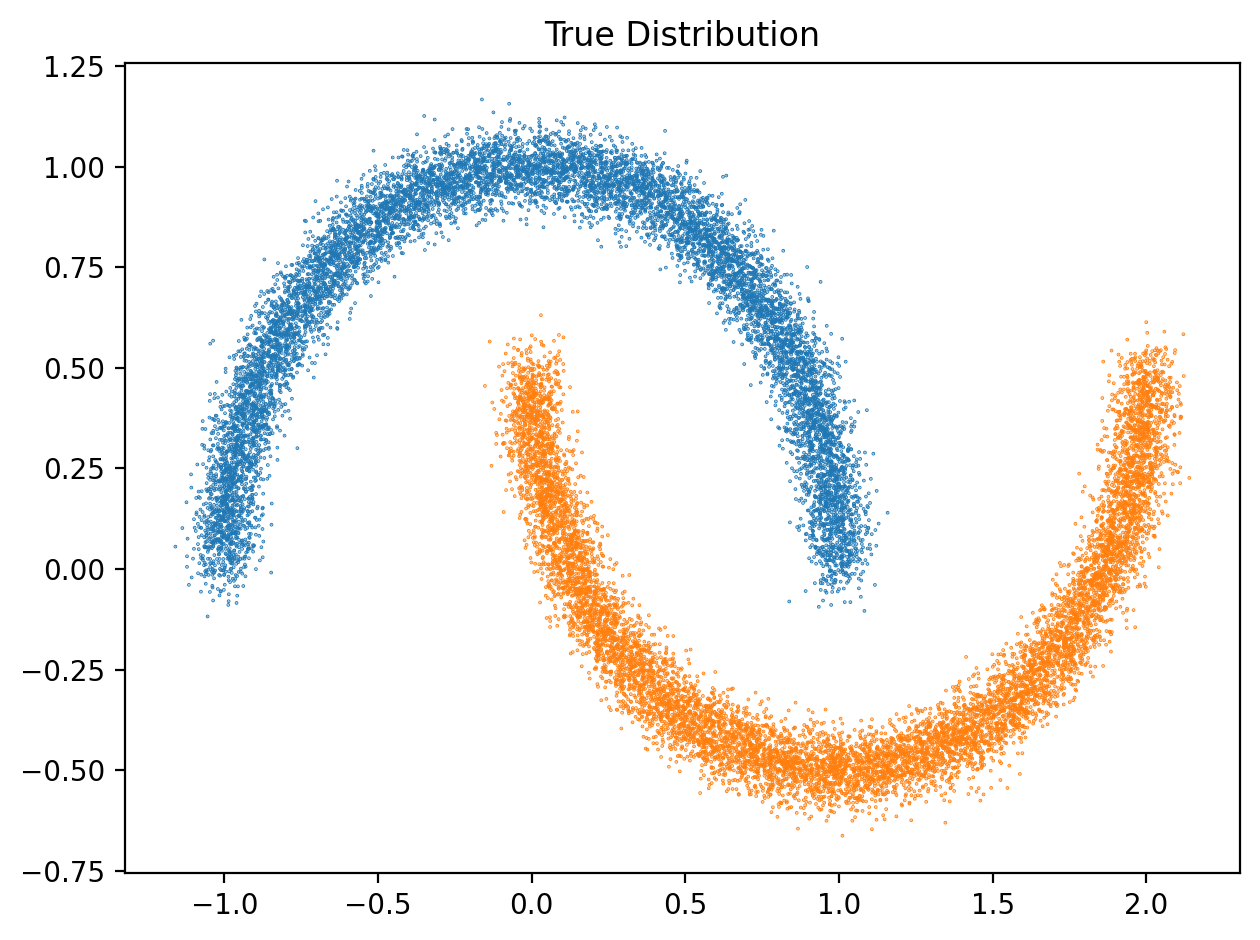

In [51]:
plt.scatter(train_x[:, 0], train_x[:, 1], s=0.1, c=[f"C{y}" for y in train_y])
plt.title("True Distribution")
plt.tight_layout()
plt.savefig("moons_true.png")
plt.show()

In [52]:
hparams = dict(
    input_shape=input_shape,
    batch_size=128,
    steps=8,
    subnet_widths=[64, 128, 64],
    learning_rate=1e-3,
)

In [53]:
additive = DenseFlow(train_data, val_data, coupling_type="additive", **hparams)
affine = DenseFlow(train_data, val_data, coupling_type="affine", **hparams)
spline = DenseFlow(train_data, val_data, coupling_type="spline", **hparams)

In [54]:
max_epochs = 25
additive_trainer = lightning.Trainer(
    max_epochs=max_epochs,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)
affine_trainer = lightning.Trainer(
    max_epochs=max_epochs,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)
spline_trainer = lightning.Trainer(
    max_epochs=max_epochs,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [55]:
torch.autograd.set_grad_enabled(True)
additive_trainer.fit(additive)
affine_trainer.fit(affine)
spline_trainer.fit(spline)
torch.autograd.set_grad_enabled(False)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type     | Params
----------------------------------
0 | inn  | GraphINN | 268 K 
----------------------------------
268 K     Trainable params
0         Non-trainable params
268 K     Total params
1.073     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/lars/code/python/neural-spline-flows/.venv/lib/python3.10/site-packages/pytorch_lightning/core/module.py:555: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  value = torch.tensor(value, device=self.device)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type     | Params
----------------------------------
0 | inn  | GraphINN | 269 K 
----------------------------------
269 K     Trainable params
0         Non-trainable params
269 K     Total params
1.077     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type     | Params
----------------------------------
0 | inn  | GraphINN | 298 K 
----------------------------------
298 K     Trainable params
0         Non-trainable params
298 K     Total params
1.194     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=25` reached.


In [56]:
additive.eval()
affine.eval()
spline.eval()

DenseFlow(
  (inn): GraphINN(
    (module_list): ModuleList(
      (0): RationalQuadraticSpline(
        (subnet1): Sequential(
          (input_layer): Sequential(
            (0): Linear(in_features=1, out_features=64, bias=True)
            (1): ReLU()
          )
          (hidden_layer_1): Sequential(
            (0): Dropout(p=0.0, inplace=False)
            (1): Linear(in_features=64, out_features=128, bias=True)
            (2): ReLU()
          )
          (hidden_layer_2): Sequential(
            (0): Dropout(p=0.0, inplace=False)
            (1): Linear(in_features=128, out_features=64, bias=True)
            (2): ReLU()
          )
          (output_layer): Linear(in_features=64, out_features=30, bias=True)
        )
        (subnet2): Sequential(
          (input_layer): Sequential(
            (0): Linear(in_features=1, out_features=64, bias=True)
            (1): ReLU()
          )
          (hidden_layer_1): Sequential(
            (0): Dropout(p=0.0, inplace=False)
   

In [57]:
n_samples = 1000
additive_samples = additive.generate(shape=(n_samples,), temperature=0.8).numpy()
affine_samples = affine.generate(shape=(n_samples,), temperature=0.8).numpy()
spline_samples = spline.generate(shape=(n_samples,), temperature=0.8).numpy()

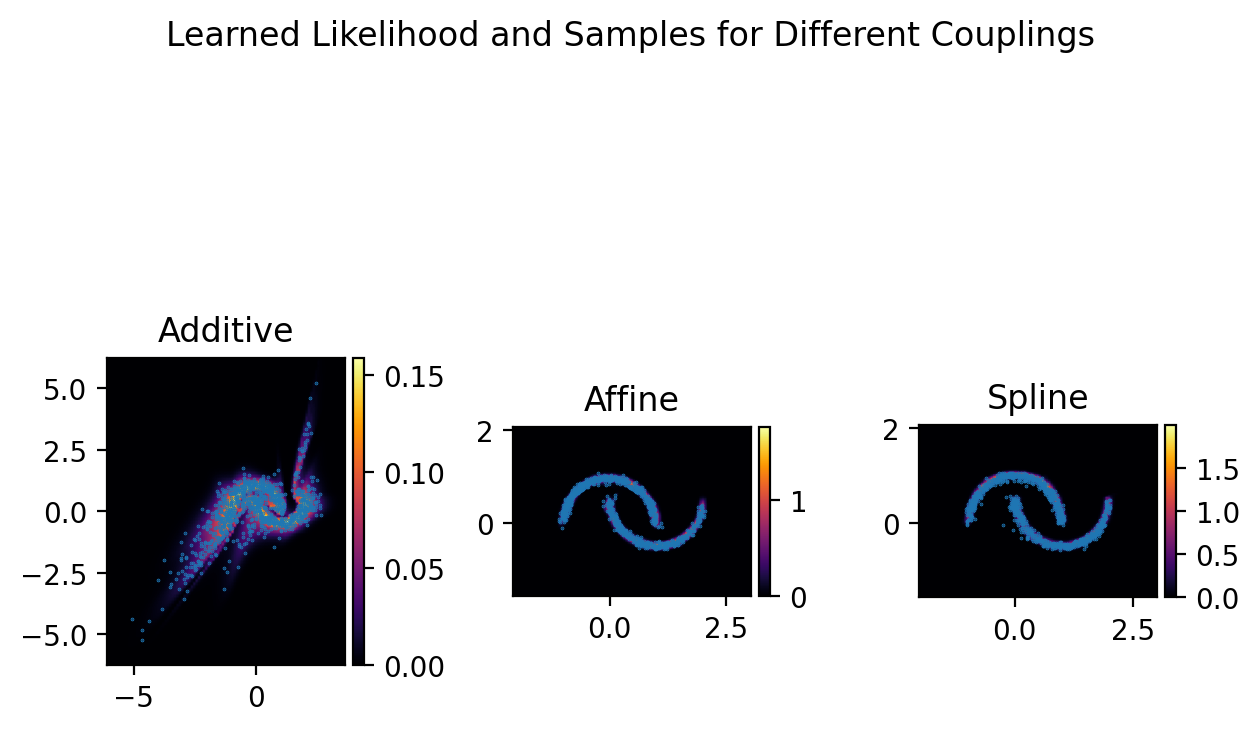

In [58]:
xmin, ymin = np.min(additive_samples, axis=0)
xmax, ymax = np.max(additive_samples, axis=0)

xmin = xmin - 1
xmax = xmax + 1
ymin = ymin - 1
ymax = ymax + 1

nx = 100
ny = 100

x = np.linspace(xmin, xmax, nx, dtype=np.float32)
y = np.linspace(ymin, ymax, ny, dtype=np.float32)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy)

additive_likelihood = np.exp(additive.log_likelihood(xy).numpy()).reshape(nx, ny)

fig, axes = plt.subplots(nrows=1, ncols=3)
artist = axes[0].imshow(additive_likelihood, cmap="inferno", extent=(xmin, xmax, ymin, ymax), origin="lower")
axes[0].scatter(additive_samples[:, 0], additive_samples[:, 1], s=0.1)
divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="4.6%", pad=0.04)
fig.colorbar(artist, cax=cax, orientation="vertical")

axes[0].set_title("Additive")

xmin, ymin = np.min(affine_samples, axis=0)
xmax, ymax = np.max(affine_samples, axis=0)

xmin = xmin - 1
xmax = xmax + 1
ymin = ymin - 1
ymax = ymax + 1

nx = 100
ny = 100

x = np.linspace(xmin, xmax, nx, dtype=np.float32)
y = np.linspace(ymin, ymax, ny, dtype=np.float32)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy)

affine_likelihood = np.exp(affine.log_likelihood(xy).numpy()).reshape(nx, ny)

artist = axes[1].imshow(affine_likelihood, cmap="inferno", extent=(xmin, xmax, ymin, ymax), origin="lower")
axes[1].scatter(affine_samples[:, 0], affine_samples[:, 1], s=0.1)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="4.6%", pad=0.04)
fig.colorbar(artist, cax=cax, orientation="vertical")

axes[1].set_title("Affine")

xmin, ymin = np.min(spline_samples, axis=0)
xmax, ymax = np.max(spline_samples, axis=0)

xmin = xmin - 1
xmax = xmax + 1
ymin = ymin - 1
ymax = ymax + 1

nx = 100
ny = 100

x = np.linspace(xmin, xmax, nx, dtype=np.float32)
y = np.linspace(ymin, ymax, ny, dtype=np.float32)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy)

spline_likelihood = np.exp(spline.log_likelihood(xy).numpy()).reshape(nx, ny)

artist = axes[2].imshow(spline_likelihood, cmap="inferno", extent=(xmin, xmax, ymin, ymax), origin="lower")
axes[2].scatter(spline_samples[:, 0], spline_samples[:, 1], s=0.1)

divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="4.6%", pad=0.04)
fig.colorbar(artist, cax=cax, orientation="vertical")

axes[2].set_title("Spline")

fig.suptitle("Learned Likelihood and Samples for Different Couplings")
plt.tight_layout()
plt.savefig("moons_learned.png")
plt.show()

In [60]:
train_x, train_y = make_circles(train_samples * 2, noise=noise, factor=0.5)
val_x, _ = make_circles(val_samples * 2, noise=noise, factor=0.5)

train_data = SingleTensorDataset(train_x.astype(np.float32))
val_data = SingleTensorDataset(val_x.astype(np.float32))

In [ ]:
plt.scatter(train_x[:, 0], train_x[:, 1], s=0.1, c=[f"C{y}" for y in train_y])
plt.title("True Distribution")
plt.tight_layout()
plt.savefig("circles_true.png")
plt.show()

In [ ]:
hparams = dict(
    input_shape=input_shape,
    batch_size=128,
    coupling_type="affine",
    steps=32,
)

In [ ]:
module = DenseFlow(train_data, val_data, **hparams)

print(module.hparams)

In [ ]:
trainer = lightning.Trainer(
    max_epochs=100,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)

In [ ]:
torch.autograd.set_grad_enabled(True)
trainer.fit(module)
torch.autograd.set_grad_enabled(False)

In [ ]:
module = module.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
module.eval()

In [ ]:
n_samples = 1000
samples = module.generate(shape=(n_samples,), temperature=0.8).numpy()

In [ ]:
xmin, ymin = np.min(samples, axis=0)
xmax, ymax = np.max(samples, axis=0)

xmin = xmin - 1
xmax = xmax + 1
ymin = ymin - 1
ymax = ymax + 1

nx = 100
ny = 100

x = np.linspace(xmin, xmax, nx, dtype=np.float32)
y = np.linspace(ymin, ymax, ny, dtype=np.float32)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy)

likelihood = np.exp(module.log_likelihood(xy).numpy())
likelihood = likelihood.reshape(nx, ny)

In [ ]:
artist = plt.imshow(likelihood, cmap="inferno", extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.scatter(samples[:, 0], samples[:, 1], s=0.1, label="samples")
plt.colorbar(artist, fraction=0.046, pad=0.04)
plt.title("Learned Likelihood")
plt.legend()
plt.tight_layout()
plt.savefig("circles_learned.png")
plt.show()

In [ ]:
def make_blobs(samples_per_blob: int = 100, *, centers: int = 8, radius: float = 10.0, std: float = 1.0, shuffle=True):
    """ Make 2D gaussian blobs distributed equally on a circle about the origin """
    phis = np.linspace(0, 2 * np.pi, num=centers + 1)[:-1]
    means = np.empty((centers, 2))
    means[:, 0] = radius * np.cos(phis)
    means[:, 1] = radius * np.sin(phis)

    samples = np.random.normal(means, std, size=(samples_per_blob, centers, 2))
    labels = np.resize(np.arange(centers), (samples_per_blob, centers))

    # flatten
    samples = samples.reshape(samples_per_blob * centers, 2)
    labels = labels.reshape(-1)

    if shuffle:
        sort = np.random.permutation(len(samples))
        samples = samples[sort, ...]
        labels = labels[sort, ...]

    return samples, labels

In [ ]:
train_x, train_y = make_blobs(train_samples)
val_x, _ = make_blobs(val_samples)

train_data = SingleTensorDataset(train_x.astype(np.float32))
val_data = SingleTensorDataset(val_x.astype(np.float32))

In [ ]:
plt.scatter(train_x[:, 0], train_x[:, 1], s=0.1, c=[f"C{y}" for y in train_y])
plt.title("True Distribution")
plt.tight_layout()
plt.savefig("blobs_true.png")
plt.show()

In [ ]:
hparams = dict(
    input_shape=input_shape,
    batch_size=128,
    coupling_type="affine",
    steps=32,
)

In [ ]:
module = DenseFlow(train_data, val_data, **hparams)

print(module.hparams)

In [ ]:
trainer = lightning.Trainer(
    max_epochs=100,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)

In [ ]:
torch.autograd.set_grad_enabled(True)
trainer.fit(module)
torch.autograd.set_grad_enabled(False)

In [ ]:
module = module.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
module.eval()

In [ ]:
n_samples = 1000
samples = module.generate(shape=(n_samples,), temperature=0.8).numpy()

In [ ]:
xmin, ymin = np.min(samples, axis=0)
xmax, ymax = np.max(samples, axis=0)

xmin = xmin - 1
xmax = xmax + 1
ymin = ymin - 1
ymax = ymax + 1

nx = 100
ny = 100

x = np.linspace(xmin, xmax, nx, dtype=np.float32)
y = np.linspace(ymin, ymax, ny, dtype=np.float32)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy)

likelihood = np.exp(module.log_likelihood(xy).numpy())
likelihood = likelihood.reshape(nx, ny)

In [ ]:
artist = plt.imshow(likelihood, cmap="inferno", extent=(xmin, xmax, ymin, ymax), origin="lower")
plt.scatter(samples[:, 0], samples[:, 1], s=0.1, label="samples")
plt.colorbar(artist, fraction=0.046, pad=0.04)
plt.title("Learned Likelihood")
plt.legend()
plt.tight_layout()
plt.savefig("blobs_learned.png")
plt.show()

In [ ]:
input_shape = (3, 16, 16)

In [ ]:
transform = transforms.Compose([
    transforms.PILToTensor(),
    # change data type and normalize to [0, 1]
    transforms.ConvertImageDtype(torch.float32),
    # bi-linear upscale
    transforms.Resize(input_shape[1:]),
    # grayscale to rgb
    lambda x: x.expand(input_shape),
])

In [ ]:
def filter_labels(dataset, keep=None, drop=None):
    match (keep, drop):
        case (None, None):
            raise ValueError(f"Must specify exactly one of keep or drop.")
        case (keep, None):
            mask = torch.isin(dataset.targets, torch.as_tensor(keep))
        case (None, drop):
            mask = ~torch.isin(dataset.targets, torch.as_tensor(drop))
        case _:
            raise ValueError(f"Must specify exactly one of keep or drop.")

    return Subset(dataset, mask.nonzero().squeeze())

In [ ]:
train_data = MNIST(root="mnist", train=True, download=True, transform=transform)
val_data = MNIST(root="mnist", train=False, download=True, transform=transform)

keep = [8]

train_data = filter_labels(train_data, keep=keep)
val_data = filter_labels(val_data, keep=keep)

print(f"{len(train_data)} images in train set")
print(f"{len(val_data)} images in validation set")

In [ ]:
train_data = UnlabeledDataset(train_data)
val_data = UnlabeledDataset(val_data)

In [ ]:
x = train_data[0].movedim(0, -1)
plt.imshow(x)
plt.show()

In [ ]:
hparams = dict(
    input_shape=input_shape,
    batch_size=64,
    coupling_type="affine",
    steps=32,
)

In [ ]:
module = ImageFlow(train_data, val_data, **hparams)

In [ ]:
trainer = lightning.Trainer(
    max_epochs=100,
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
)

In [ ]:
torch.autograd.set_grad_enabled(True)
trainer.fit(module)
torch.autograd.set_grad_enabled(False)

In [ ]:
module = module.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
module.eval()

In [ ]:
samples = module.generate(shape=(9,), temperature=0.8).movedim(1, -1)

In [ ]:
for i, s in enumerate(samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(s)

plt.show()